# Logistic Regression From Scratch

We will build a logistic regression model for classifying whether a patient has diabetes or not. We will
only use python to build functions for reading, normalizing data, optimizing parameters.

## What is Logistic Regression?

Logistic regression is a **supervised** machine learning algorithm used for **classification** purposes.
Logistic Regression is somewhat the same as linear regression but is has a different **cost function** 
and **prediction function**.

$$
\text{Sigmoid Function: } g(z) = \frac{1}{1+e^{-z}}
$$

$$
\text{Hypothesis: } h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}
$$

Note that the range of g is $[0,1]$ where values that are above and include a threshold $\alpha\in (0,1)$ represent the class 1 and values below
$\alpha$ represent the class 0.

## Cost Function

**Cost functions** find the error between the **actual value** and the **predicted value** of our
algorithm. The error should be as small as possible. 

In the case of linear regression, the formula is

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m (\theta^T x^i - y^i)^2
$$

Where m is the number of examples of rows in the data set, $x^i$ is the feature values of the $i-th$ example,
and $y^i$ is the actual outcome of the $i-th$ example. Note that we want each $(h_\theta(x^i) - y^i)^2$ as small as possible but this formula **cannot** be used for **logistic regression** since $h_\theta$ is not convex so there is a chance of finding the local minima thus missing the global minima. Let us change each term in the summation above to 

$$
-y^i \log (h_\theta(x^i)) - (1-y^i)\log (1 - h_\theta(x^i))
$$

 In case $y^i=1$, the output (i.e. the cost to pay) approaches to 0 as $h_\theta(x^i)$ approaches to 1. Conversely, the cost to pay grows to infinity as $h_\theta(x^i)$ approaches to 0. You can clearly see it in the plot below, left side. 

<img src='img/ex1.png'>

This is a desirable property: we want a bigger penalty as the algorithm predicts something far away from the actual value. If the label is $y^i=1$ but the algorithm predicts $h_\theta(x^i) = 0$, the outcome is completely wrong.

Conversely, the same intuition applies when 𝑦=0, depicted in the plot above, right side. Bigger penalties when the label is $y^i=0$ but the algorithm predicts $h_\theta(x^i) = 1$. Each term is convex and we want each term as small as possible so we can rewrite our new cost function as

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big[y^i \log (h_\theta(x^i)) + (1-y^i)\log (1 - h_\theta(x^i))\big]
$$

## Gradient Descent

The goal of an ML algorithm is to find the set of parameters that **minimizes**
the **cost function**. Here is where we use optimization techniques. One of them
is called gradient descent. 

First, we start with random values of parameters (in most cases **zero**) then
keep changing the parameters to reduce $J(\theta)$, the formula is:

Repeat:
$$
\theta_j:= \theta_j - \alpha\frac{\partial}{\partial\theta_j} J(\theta)
$$

Note that 
$$
\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i
$$ 

or
 
$$
X^T(h_\theta(x) - y)
$$

So we have

Repeat:
$$
\theta_j:= \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i
$$

## Dataset

We will be using **Pima Indians Diabetes Dataset**. The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

## Now Let's Code

### Convert csv file to tabular data

In [11]:
import csv
import numpy as np


with open('Pima_Indians_Diabetes_Data.csv') as file:
    table  = csv.reader(file)
    table = [val for val in table]

data = [[float(num) for num in row] for row in table]
data = np.array(data)
data[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

## Min-Max Scaling (Normalization)

In [12]:
n = data.shape[1]

for i in range(n):
    data[:,i] = (data[:,i] - data[:,i].min(axis = 0))/(data[:,i].max(axis=0) - data[:,i].min(axis=0))

for i in range(n):
    minumum = data[:,i].min(axis=0)
    maximum = data[:,i].max(axis=0)
    print(minumum, maximum)

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


### Split Data 80% Training Data  20% Test Data

In [13]:
np.random.shuffle(data)

m = data.shape[0]
split_point = int(.8*m)

training, test = data[:split_point], data[split_point:]
print('training shape {} and test shape {}'.format(training.shape, test.shape))


training shape (614, 9) and test shape (154, 9)


### f-score

In [14]:
def fscore(actual, predicted):
    n = len(actual)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(n):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    f = 2*(precision*recall/(precision+recall))
        
    return f


### Hypothesis Function

Our `prediction` function is our hypothesis function that takes the whole row and parameters as arguments.

In [15]:
def hyp(z):
    return 1/(1+np.e**(-z))

### Cost Function

We will use the cost function to calculate the cost with every iteration and plot that data point.
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big[y^i \log (h_\theta(x^i)) + (1-y^i)\log (1 - h_\theta(x^i))\big]
$$

In [16]:
def cost(data, params):
    y = data[:,-1]
    X = np.c_[np.ones((data.shape[0],1)), data[:,:-1]]

    z = np.dot(X,params)
    logyhat = np.log2(hyp(z))
    otheryhat = np.log2(1-hyp(z))

    cost0 = y.T.dot(logyhat)
    cost1 = (1-y).T.dot(otheryhat)

    return -(cost0+cost1)/len(y)    

### Optimization Technique

Here we use the `gradient_descent` function for finding the best set of parameters for our model. This function
takes **dataset**, **epochs**(number of iterations), and **alpha**(learning rate) as arguments. 
$$
X^T(h_\theta(x) - y)
$$

So we have

Repeat:
$$
\theta_j:= \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i
$$

In [17]:
def fit(train, iter=1000, alpha=.001):
    params = np.zeros((train.shape[1],1))
    X = np.c_[np.c_[np.ones((train.shape[0],1)), train[:,:-1]]]
    y = train[:,-1]
    y = np.reshape(y,(len(y),1))
    costs = []

    for _ in range(iter):
        z = np.dot(X,params)
        logyhat = hyp(z)   
        params = params - alpha*np.dot(X.T, logyhat - y)

        costs.append(cost(train, params))

    return costs, params


def predict(test, params):
    X = np.c_[np.c_[np.ones((test.shape[0],1)), test[:,:-1]]]
    y = test[:,-1]

    z = np.dot(X,params)
    yhat = hyp(z)
    yhat_bin = np.where(yhat > .5, 1, 0)

    return yhat_bin, yhat

In [18]:
costs, params = fit(training)
yhat_bin, yhat = predict(test, params)

print('f1-score ', fscore(test[:,-1] ,yhat_bin))

f1-score  0.5714285714285715


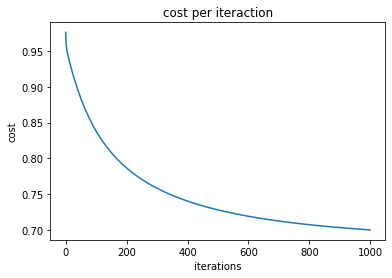

In [19]:
import matplotlib.pyplot as plt

y_axis = costs

plt.plot(y_axis) 
plt.xlabel('iterations') 
plt.ylabel('cost') 
plt.title('cost per iteraction') 
plt.show() 

## Let’s see how our logistic regression fares in comparison to sklearn’s logistic regression.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

df = pd.read_csv('Pima_Indians_Diabetes_Data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
fscore = f1_score(y_pred, y_test)
print('f1 score: ', fscore)


f1 score:  0.6249999999999999


### Conclusion

We have successfully built a **Logistic Regression** model from scratch with out using **pandas**, **scikit learn**.
Note that matplotlib was not neccessary but we did use it to see how the cost function decreases for each iteration.